[nltk_data] Downloading package stopwords to /home/anuj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/anuj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


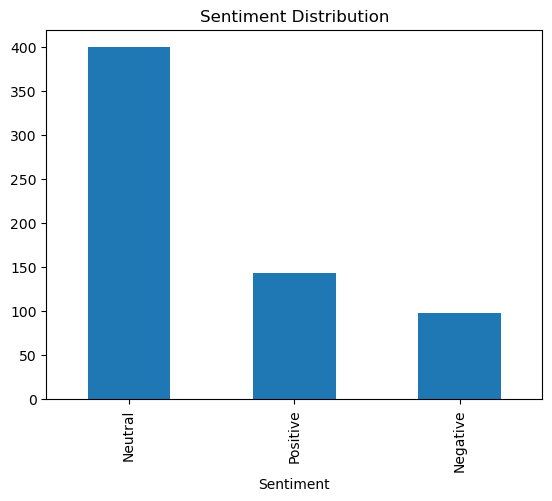


Top Topics:
Topic 0: 0.015*"tech" + 0.008*"life" + 0.006*"says" + 0.004*"new" + 0.004*"trumps" + 0.004*"india" + 0.003*"watch" + 0.003*"deal" + 0.003*"pharma" + 0.003*"announces"
Topic 1: 0.010*"india" + 0.007*"trade" + 0.006*"court" + 0.005*"tiktok" + 0.005*"deal" + 0.004*"rupee" + 0.004*"trump" + 0.004*"dollar" + 0.004*"supreme" + 0.004*"early"
Topic 2: 0.011*"says" + 0.005*"new" + 0.004*"trump" + 0.004*"gaza" + 0.004*"ukraine" + 0.004*"government" + 0.004*"facility" + 0.003*"war" + 0.003*"year" + 0.003*"jaishankar"
Topic 3: 0.012*"india" + 0.009*"says" + 0.006*"indias" + 0.005*"first" + 0.004*"new" + 0.004*"pakistan" + 0.003*"september" + 0.003*"report" + 0.003*"global" + 0.003*"october"
Topic 4: 0.008*"trump" + 0.006*"india" + 0.004*"data" + 0.004*"watch" + 0.004*"one" + 0.004*"president" + 0.004*"pakistan" + 0.003*"hybrid" + 0.003*"report" + 0.003*"says"
✅ Analysis done. Results saved in news_text_analysis.csv


In [8]:
# -----------------------------
# Mithun - Text Analytics (Insight Extractor)
# -----------------------------
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from textblob import TextBlob
from gensim import corpora, models
import matplotlib.pyplot as plt

# Download essentials
nltk.download('stopwords')
nltk.download('punkt')
nlp = spacy.load("en_core_web_sm")

# Load dataset from Anuj’s part
df = pd.read_csv("news_dataset_100.csv")

# -----------------------------
# 1. Preprocessing
# -----------------------------
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # remove links
    text = re.sub(r"[^a-z\s]", "", text)        # keep only letters
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

df["Cleaned_Text"] = df["Headline"].apply(clean_text)

# -----------------------------
# 2. Sentiment Analysis
# -----------------------------
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0: 
        return "Positive"
    elif polarity < 0: 
        return "Negative"
    else: 
        return "Neutral"

df["Sentiment"] = df["Cleaned_Text"].apply(get_sentiment)

# Sentiment distribution plot
df["Sentiment"].value_counts().plot(kind="bar", title="Sentiment Distribution")
plt.show()

# -----------------------------
# 3. Topic Modeling (LDA)
# -----------------------------
texts = [t.split() for t in df["Cleaned_Text"] if isinstance(t, str)]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

print("\nTop Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# -----------------------------
# 4. Save outputs
# -----------------------------
df.to_csv("news_text_analysis.csv", index=False, encoding="utf-8-sig")
print("✅ Analysis done. Results saved in news_text_analysis.csv")
